In [23]:
import pandas as pd  # For Data Manipulation
import numpy as np  # For Array Manipulation

import calendar  # For Month Manipulation

import matplotlib.pyplot as plt  # For Data Visualization
#import seaborn as sb  # For Data Visualization

In [6]:
music = pd.read_csv(r"C:\Users\pkare\Documents\Data Bootcamp\project-1\mxmh_survey_results.csv", encoding= "Latin-1")

In [8]:
music.sample(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
657,9/13/2022 16:16:16,28.0,I do not use a streaming service.,1.0,Yes,No,No,Rock,No,No,...,Never,Never,Sometimes,Never,2.0,1.0,2.0,2.0,Improve,I understand.
585,9/6/2022 13:26:11,18.0,Apple Music,1.0,No,Yes,No,Rap,Yes,Yes,...,Never,Very frequently,Never,Sometimes,2.0,0.0,3.0,0.0,Improve,I understand.
305,8/29/2022 3:49:29,56.0,I do not use a streaming service.,1.0,Yes,No,No,Pop,No,No,...,Sometimes,Never,Sometimes,Never,6.0,5.0,10.0,2.0,No effect,I understand.
492,9/1/2022 20:36:10,18.0,I do not use a streaming service.,1.0,Yes,No,Yes,Video game music,No,No,...,Rarely,Sometimes,Sometimes,Very frequently,4.0,5.0,7.0,0.0,No effect,I understand.
241,8/28/2022 23:04:08,18.0,Spotify,2.0,Yes,Yes,Yes,Rock,Yes,No,...,Never,Rarely,Very frequently,Never,6.0,7.0,4.0,3.0,Improve,I understand.


In [10]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [26]:
music = music.dropna(axis= 0)
music.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [20]:
cols = list(music.columns.values)
cols

['Timestamp',
 'Age',
 'Primary streaming service',
 'Hours per day',
 'While working',
 'Instrumentalist',
 'Composer',
 'Fav genre',
 'Exploratory',
 'Foreign languages',
 'BPM',
 'Frequency [Classical]',
 'Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [Hip hop]',
 'Frequency [Jazz]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]',
 'Frequency [Metal]',
 'Frequency [Pop]',
 'Frequency [R&B]',
 'Frequency [Rap]',
 'Frequency [Rock]',
 'Frequency [Video game music]',
 'Anxiety',
 'Depression',
 'Insomnia',
 'OCD',
 'Music effects',
 'Permissions']

In [29]:
music['Fav genre'].unique()

array(['Video game music', 'Jazz', 'R&B', 'K pop', 'Rock', 'EDM',
       'Country', 'Hip hop', 'Rap', 'Pop', 'Classical', 'Metal', 'Folk',
       'Lofi', 'Gospel', 'Latin'], dtype=object)

In [57]:
fav_genre = music.groupby('Fav genre')

video_game = fav_genre.get_group('Video game music')
jazz = fav_genre.get_group('Jazz')
rnb = fav_genre.get_group('R&B')
k_pop = fav_genre.get_group('K pop')
rock = fav_genre.get_group('Rock')
edm = fav_genre.get_group('EDM')
country = fav_genre.get_group('Country')
hip_hop = fav_genre.get_group('Hip hop')
rap = fav_genre.get_group('Rap')
pop = fav_genre.get_group('Pop')
classical = fav_genre.get_group('Classical')
metal = fav_genre.get_group('Metal')
folk = fav_genre.get_group('Folk')
lofi = fav_genre.get_group('Lofi')
gospel = fav_genre.get_group('Gospel')
latin = fav_genre.get_group('Latin')

video_game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2 to 725
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     36 non-null     object 
 1   Age                           36 non-null     float64
 2   Primary streaming service     36 non-null     object 
 3   Hours per day                 36 non-null     float64
 4   While working                 36 non-null     object 
 5   Instrumentalist               36 non-null     object 
 6   Composer                      36 non-null     object 
 7   Fav genre                     36 non-null     object 
 8   Exploratory                   36 non-null     object 
 9   Foreign languages             36 non-null     object 
 10  BPM                           36 non-null     float64
 11  Frequency [Classical]         36 non-null     object 
 12  Frequency [Country]           36 non-null     object 
 13  Frequency [

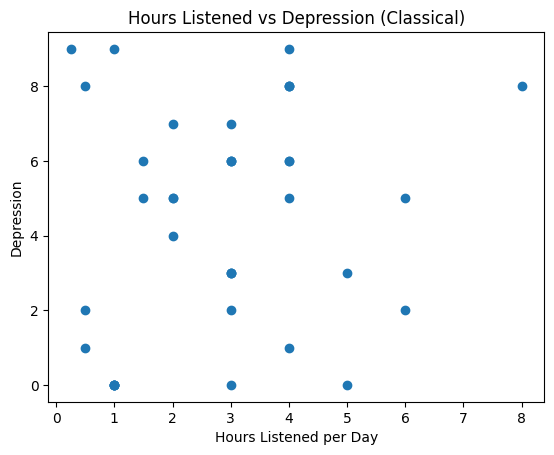

In [58]:
x = classical['Hours per day']
y = classical['Depression']
plt.scatter(x, y)
plt.xlabel("Hours Listened per Day")
plt.ylabel("Depression")
plt.title("Hours Listened vs Depression (Classical)")
plt.show()

In [60]:
summary = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'],
                                            how='outer'), data_frames)


<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            8 non-null      float64
 1   Hours per day  8 non-null      float64
 2   BPM            8 non-null      float64
 3   Anxiety        8 non-null      float64
 4   Depression     8 non-null      float64
 5   Insomnia       8 non-null      float64
 6   OCD            8 non-null      float64
dtypes: float64(7)
memory usage: 512.0+ bytes
